# World Press Index

According to wikipedia, the Press Freedom Index is an annual ranking of countries compiled and published by Reporters Without Borders since 2002 based upon the organisation's own assessment of the countries' press freedom records in the previous year. It intends to reflect the degree of freedom that journalists, news organisations, and netizens have in each country, and the efforts made by authorities to respect this freedom. Reporters Without Borders is careful to note that the index only deals with press freedom and does not measure the quality of journalism, nor does it look at human rights violations in general.

# Table of Content

#### 1. [ Loading and Preparing Data](#section-one)
#### 2. [ Country Based Observation](#section-two)
#### 3. [ Continent Based Press Index](#section-three)
#### 4. [ World map by Global Press Index](#section-four)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
import plotly.express as px
import plotly.graph_objs as go

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/world-press-index-20192021/World Press Index 2021.csv


<a id="section-one"></a>
# 1. Loading and Preparing Data

In [2]:
data = pd.read_csv("../input/world-press-index-20192021/World Press Index 2021.csv").set_index("Country Name")
data.head()

,Abuse Score 2021,Underlying Situation Score 2021,Global Score 2021,Global Score 2020,Global Score 2019
Country Name,,,,,
Norway,0.00,6.72,6.72,7.84,7.82
Finland,0.00,6.99,6.99,7.93,7.90
Sweden,0.00,7.24,7.24,9.25,8.31
Denmark,0.00,8.57,8.57,8.13,9.87
Costa Rica,10.99,8.21,8.76,10.53,12.24


In [3]:
data.index.unique()

Index(['Norway', 'Finland', 'Sweden', 'Denmark', 'Costa Rica', 'Netherlands',
       'Jamaica', 'New Zealand', 'Portugal', 'Switzerland',
       ...
       'Cuba', 'Laos', 'Syria', 'Iran', 'Vietnam', 'Djibouti', 'China',
       'Turkmenistan', 'North Korea', 'Eritrea'],
      dtype='object', name='Country Name', length=180)

In [4]:
for country in data.index:
    code = [value.alpha_3 for value in pycountry.countries if (value.name==country)]
    if len(code)==0:
        data.at[country,"iso_alpha"]= None
        data.at[country,"Country"]= country
    else:
        data.at[country,"iso_alpha"]= code[0]
        data.at[country,"Country"]= country

data.head()

,Abuse Score 2021,Underlying Situation Score 2021,Global Score 2021,Global Score 2020,Global Score 2019,iso_alpha,Country
Country Name,,,,,,,
Norway,0.00,6.72,6.72,7.84,7.82,NOR,Norway
Finland,0.00,6.99,6.99,7.93,7.90,FIN,Finland
Sweden,0.00,7.24,7.24,9.25,8.31,SWE,Sweden
Denmark,0.00,8.57,8.57,8.13,9.87,DNK,Denmark
Costa Rica,10.99,8.21,8.76,10.53,12.24,CRI,Costa Rica


In [5]:
data.isnull().sum()

Abuse Score 2021                    0
Underlying Situation Score 2021     0
Global Score 2021                   0
Global Score 2020                   0
Global Score 2019                   0
iso_alpha                          25
Country                             0
dtype: int64

iso_alpha code is missing for 25 countries.



<a id="section-two"></a>
# 2. Country Based Observation

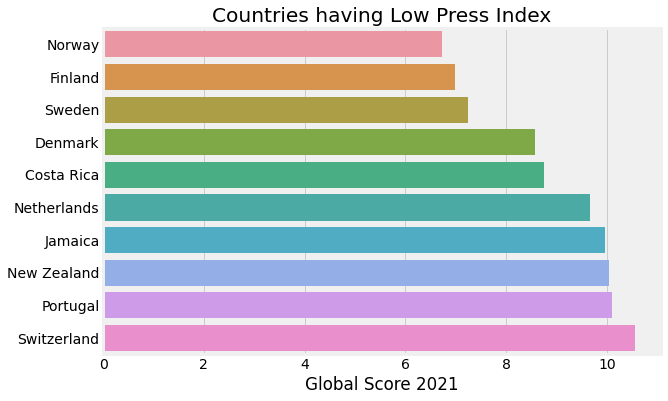

In [6]:
plt.figure(figsize=(10,6))
plt.style.use("fivethirtyeight")
sns.barplot(x="Global Score 2021", y="Country",  data=data.iloc[:10])
plt.title("Countries having Low Press Index")
plt.ylabel("")
plt.xlabel("Global Score 2021")
plt.show()

### The lower the Global Score of the country, the better the rank of a country. Norway is the best country for journalists and journalism in general.

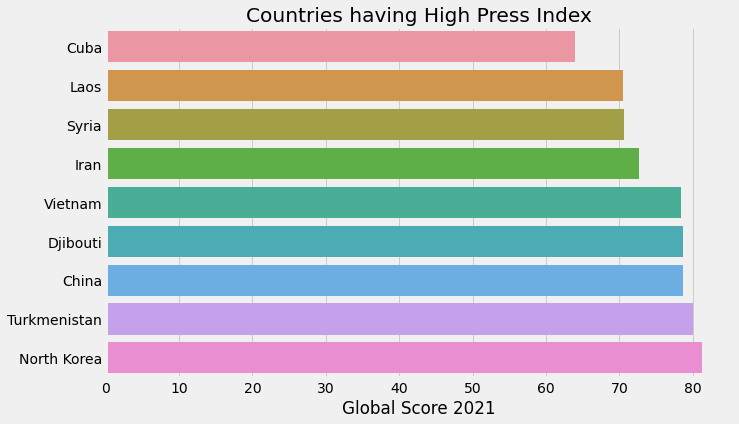

In [7]:
plt.figure(figsize=(10,6))
plt.style.use("fivethirtyeight")
sns.barplot(x="Global Score 2021", y="Country",  data=data.iloc[-10:-1])
plt.title("Countries having High Press Index")
plt.ylabel("")
plt.xlabel("Global Score 2021")
plt.show()

### On the other hand the higher the Global Score of the country the worst the condition on journalism.


<a id="section-three"></a>
# 3. Continent Based Press Index


In [8]:
def plot_Global_press_index(year, continent="world",title="Countries using Press Index-"):
    fig = px.choropleth(data, locations="iso_alpha",
                        color="Global Score "+str(year),
                        hover_name="Country", # column to add to hover information
                        color_continuous_scale="Viridis",
                        scope = str(continent))
    layout = go.Layout(
        title=go.layout.Title(
            text= f"<b>{title}{year}</b>",
            x=0.5
        ),
        showlegend=False,
        font=dict(size=14),
        width = 750,
        height = 350,
        margin=dict(l=0,r=0,b=0,t=30)
    )

    fig.update_layout(layout)
    fig.show()

In [9]:
plot_Global_press_index(2021,"asia","Asian Countries Press Index-")

In [10]:
plot_Global_press_index(2021,"europe","Europian Countries Press Index-")

In [11]:
plot_Global_press_index(2021,"africa","African Countries Press Index-")

In [12]:
plot_Global_press_index(2021,"north america","North American Countries Press Index-")

In [13]:
plot_Global_press_index(2021,"south america","South American Countries Press Index-")


<a id="section-four"></a>
# 4. World map by Global Press Index

In [14]:
plot_Global_press_index(2021)

In [15]:
plot_Global_press_index(2020)

In [16]:
plot_Global_press_index(2019)